# INF264 - Project 2
`@authors` Silje Folkestad and Kristin Loka Øydna

## Overview
0. [Preprocessing Steps](#Preprocessing-Steps)
    1. [Importing Libraries](#Importing-Libraries)
    2. [Importing Datasets](#Importing-Datasets)
    3. [Visualize Handwritten Images](#Visualize-Handwritten-Images)
    4. [Finding Missing Data](#Finding-Missing-Data)
    5. [Splitting Dataset](#Splitting-Dataset)
1. [Finding the Best Hyperparameters for the Classifiers](#Finding-the-Best-Hyperparameters-for-the-Classifiers)
    1. [kNN](#kNN)
        1. [Visualization of kNN With Different Metrics and Weights](#Visualization-of-kNN-With-Different-Metrics-and-Weights)
    2. [MLP](#MPL)
    3. [Decision Tree](#Decision-Tree)
2. [Model Selection](#Model-Selection)
    1. [Visualization of Performance Measures](#Visualization-of-Performance-Measures)
3. [Model Evaluation](#Model-Evaluation)
    1. [Checking for Overfitting](#Checking-for-Overfitting)

## Preprocessing Steps

### Importing Libraries

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### Importing Datasets

In [2]:
df_img = pd.read_csv("/Users/kristinlokaoydna/UiB_Bioinformatikk/H21/INF264/Python/Prosjekt/2/handwritten_digits_images.csv", header = None)
temp_img = df_img.iloc[::4, :]
x_data = temp_img.to_numpy()


df_label = pd.read_csv("/Users/kristinlokaoydna/UiB_Bioinformatikk/H21/INF264/Python/Prosjekt/2/handwritten_digits_labels.csv", header = None)
temp_label = df_label.iloc[::4, :]
y_data = temp_label.to_numpy()
y_data = y_data.flatten()

temp_img.shape

(17500, 784)

In [60]:
# Number of pictures for digits 0-9
np.asarray(np.unique(y_data, return_counts=True)).T

array([[   0, 1726],
       [   1, 1969],
       [   2, 1748],
       [   3, 1785],
       [   4, 1706],
       [   5, 1578],
       [   6, 1719],
       [   7, 1824],
       [   8, 1706],
       [   9, 1739]])

### Visualize Handwritten Images

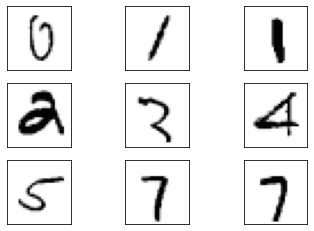

In [49]:
img_ = df_img.iloc[::7000,:].to_numpy()
img = img_.reshape(img_.shape[0], 28, 28)

for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(img[i], cmap='Greys')
    plt.tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)

plt.show()

### Finding Missing Data

In [4]:
x_sum = np.sum(x_data)
x_has_nan = np.isnan(x_sum)
print("x_data har nan:",x_has_nan)

y_sum = np.sum(y_data)
y_has_nan = np.isnan(y_sum)
print("y_data has nan:",y_has_nan)

x_data har nan: False
y_data has nan: False


### Splitting Dataset

In [5]:
X_train, X_val_test, y_train, y_val_test = train_test_split(x_data, y_data, test_size = 0.3, shuffle = True, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5, shuffle = True, random_state = 42)

## Finding the Best Hyperparameters for the Classifiers

### kNN

In [6]:
#Metric = Euclidean, weights = distance
k_list = [1, 3, 5, 7, 15]

euc_train_acc = []

for k in k_list:
    KNN_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    KNN_classifier.fit(X_train, y_train)
    train_score = cross_val_score(KNN_classifier, X_train, y_train, cv=5)
    euc_train_acc.append(train_score.mean())

In [7]:
#Metric = Minkowski, weights = distance
mink_train_acc = []

for k in k_list:
    KNN_classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', weights='distance')
    KNN_classifier.fit(X_train, y_train)
    train_score = cross_val_score(KNN_classifier, X_train, y_train, cv=5)
    mink_train_acc.append(train_score.mean())

In [8]:
#Metric = Euclidean, weights = uniform
euc_uni_train_acc = []

for k in k_list:
    KNN_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='uniform')
    KNN_classifier.fit(X_train, y_train)
    train_score = cross_val_score(KNN_classifier, X_train, y_train, cv=5)
    euc_uni_train_acc.append(train_score.mean())

In [9]:
#Metric = Minkowski, weights = uniform
mink_uni_train_acc = []

for k in k_list:
    KNN_classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', weights='uniform')
    KNN_classifier.fit(X_train, y_train)
    train_score = cross_val_score(KNN_classifier, X_train, y_train, cv=5)
    mink_uni_train_acc.append(train_score.mean())

#### Visualization of kNN With Different Metrics and Weights

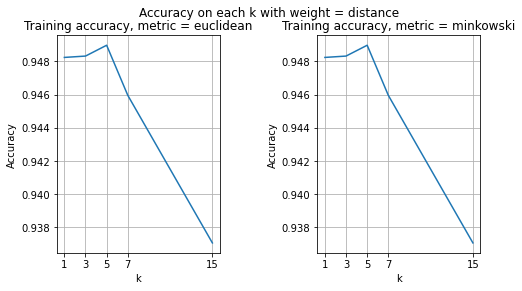

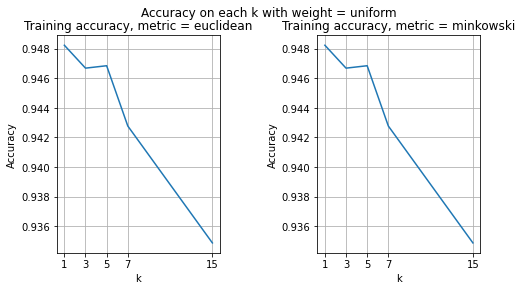

In [10]:
plt.figure()

plt.suptitle('Accuracy on each k with weight = distance', fontsize=12)

plt.subplot(121)

plt.plot(k_list, euc_train_acc)
plt.title('Training accuracy, metric = euclidean')
plt.xticks(k_list, label=k_list)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

plt.subplot(122)

plt.plot(k_list, mink_train_acc)
plt.title('Training accuracy, metric = minkowski')
plt.xticks(k_list, label=k_list)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

plt.subplots_adjust(left=0.01, right=0.99, wspace=0.6)

plt.show()

plt.figure()

plt.suptitle('Accuracy on each k with weight = uniform', fontsize=12)

plt.subplot(121)

plt.plot(k_list, euc_uni_train_acc)
plt.title('Training accuracy, metric = euclidean')
plt.xticks(k_list, label=k_list)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

plt.subplot(122)

plt.plot(k_list, mink_uni_train_acc)
plt.title('Training accuracy, metric = minkowski')
plt.xticks(k_list, label=k_list)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

plt.subplots_adjust(left=0.01, right=0.99, wspace=0.6)

plt.show()

The best hyperparameters for kNN based on train dataset: k=5, metric=Minkowski, weights=distance

### MLP

In [13]:
mlp_pipe = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier(random_state=42))])

params_mlp = [{'mlp__alpha': [0.0001,0.01, 0.1, 1], 'mlp__hidden_layer_sizes': [100, 200], 'mlp__max_iter': [100,200]}]

gs_mlp = GridSearchCV(estimator=mlp_pipe, param_grid=params_mlp, scoring='accuracy')

gs_mlp.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(random_state=42))]),
             param_grid=[{'mlp__alpha': [0.0001, 0.01, 0.1, 1],
                          'mlp__hidden_layer_sizes': [100, 200],
                          'mlp__max_iter': [100, 200]}],
             scoring='accuracy')

In [14]:
print("The best hyperparameters for mlp based on train dataset:\n", gs_mlp.best_params_)

The best hyperparameters for mlp based on train dataset:
 {'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': 200, 'mlp__max_iter': 100}


### Decision Tree 

In [34]:
dt_pipe = Pipeline([('scaler', StandardScaler()), ('dt', tree.DecisionTreeClassifier(random_state = 42))])
params_dt = [{'dt__criterion': ['gini', 'entropy'], 'dt__max_depth': [None, 20, 30, 50, 100, 1000], 'dt__max_features': [None, 'sqrt', 'log2']}]

gs_dt = GridSearchCV(estimator=dt_pipe, param_grid=params_dt, scoring='accuracy')

gs_dt.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid=[{'dt__criterion': ['gini', 'entropy'],
                          'dt__max_depth': [None, 20, 30, 50, 100, 1000],
                          'dt__max_features': [None, 'sqrt', 'log2']}],
             scoring='accuracy')

In [35]:
print("The best hyperparameters for DesicionTree based on train dataset:\n", gs_dt.best_params_)

The best hyperparameters for DesicionTree based on train dataset:
 {'dt__criterion': 'entropy', 'dt__max_depth': None, 'dt__max_features': None}


## Model Selection

In [17]:
models = {'kNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='distance'),
          'mlp': MLPClassifier(alpha= 0.1, hidden_layer_sizes= 200, max_iter= 100, random_state=42), 
          'dt': tree.DecisionTreeClassifier(criterion='entropy', max_depth=None, max_features=None, random_state=42)}

for _, model in models.items():
    model.fit(X_train, y_train)

In [18]:
# Accuracy on validation data
accuracies = {key: accuracy_score(y_val, model.predict(X_val)) for key, model in models.items()}
accuracies_df = pd.DataFrame(accuracies, index=['accuracy']).transpose().sort_values(by='accuracy', ascending=False)
print(accuracies_df)

     accuracy
kNN  0.953524
mlp  0.936381
dt   0.822476


In [29]:
# Log loss on validation data
losses = {key: log_loss(y_val, model.predict_proba(X_val)) for key, model in models.items()}
losses_df = pd.DataFrame(losses, index=['log-loss']).transpose().sort_values(by='log-loss')
print(losses_df)

     log-loss
kNN  0.522498
mlp  1.347741
dt   6.131455


In [22]:
# MSE on validation data
mse = {key: mean_squared_error(y_val, model.predict(X_val)) for key, model in models.items()}
mse_df = pd.DataFrame(mse, index=['mse']).transpose().sort_values(by='mse', ascending=True)
print(mse_df)

          mse
kNN  0.878476
mlp  1.130286
dt   2.988571


### Visualization of Performance Measures

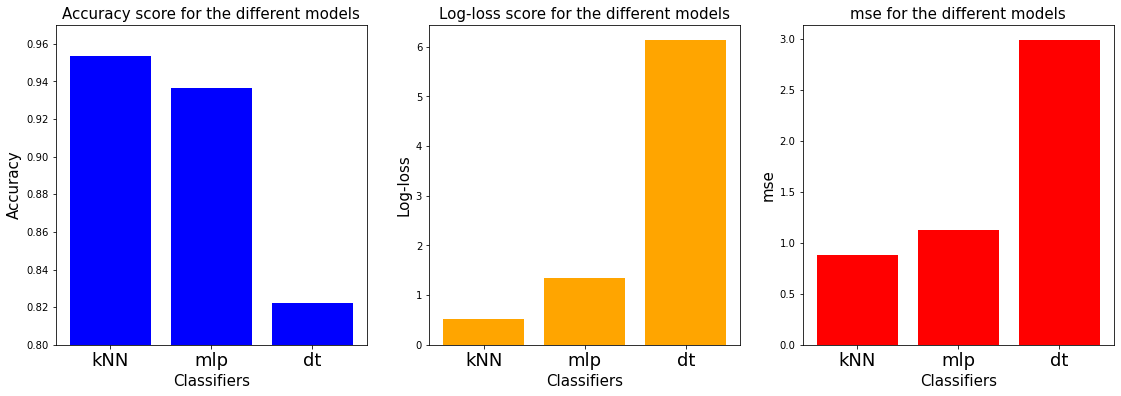

In [23]:
plt.figure(figsize = (15, 20))
plt.rc("xtick", labelsize=18)

plt.subplot(331)
plt.bar(x = accuracies_df.index.values, height = accuracies_df.iloc[:, 0], color = "blue")
plt.title("Accuracy score for the different models", fontsize=15)
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(0.8,0.97)

plt.subplot(332)
plt.bar(x = losses_df.index.values, height = losses_df.iloc[:, 0], color = "orange")
plt.title("Log-loss score for the different models", fontsize=15)
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('Log-loss', fontsize=15)

plt.subplot(333)
plt.bar(x = mse_df.index.values, height = mse_df.iloc[:, 0], color = "red")
plt.title("mse for the different models", fontsize=15)
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('mse', fontsize=15)

plt.subplots_adjust(left=0.01, right=0.99)

plt.show()

## Model Evaluation

In [27]:
# Checking the generalizability based on accuracy
best_model = models[accuracies_df.index[0]]

print('Generalized accuracy:', accuracy_score(y_test, best_model.predict(X_test)))
print('Generalized Log-loss:', log_loss(y_test, best_model.predict_proba(X_test)))
print('Generalized MSE:',mean_squared_error(y_test, best_model.predict(X_test)))
print('Generalized RMSE:',np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))))

Generalized accuracy: 0.9531428571428572
Generalized Log-loss: 0.5316581093406405
Generalized MSE: 0.8925714285714286
Generalized RMSE: 0.9447599846370657


### Checking for Overfitting

In [28]:
print("Accuracy score for train dataset on our selected model:", accuracy_score(y_train, best_model.predict(X_train)))
print("Accuracy score for test dataset on our selected model:", accuracy_score(y_test, best_model.predict(X_test)))

Accuracy score for train dataset on our selected model: 1.0
Accuracy score for test dataset on our selected model: 0.9531428571428572
